In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv("cardio_prepocessed.csv")
df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ageInYr,bmi
0,2,168,62.0,110,80,1,1,0,0,1,0,50.39,21.97
1,1,156,85.0,140,90,3,1,0,0,1,1,55.42,34.93
2,1,165,64.0,130,70,3,1,0,0,0,1,51.66,23.51
3,2,169,82.0,150,100,1,1,0,0,1,1,48.28,28.71
4,1,156,56.0,100,60,1,1,0,0,0,0,47.87,23.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69951,2,168,76.0,120,80,1,1,1,0,1,0,52.71,26.93
69952,1,158,126.0,140,90,2,2,0,0,1,1,61.92,50.47
69953,2,183,105.0,180,90,3,1,0,1,0,1,52.24,31.35
69954,1,163,72.0,135,80,1,2,0,0,0,1,61.45,27.10


In [64]:
# Statistical Outlier Detection (Interquartile Range - IQR)

Q1 = df['weight'].quantile(0.25)
Q3 = df['weight'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering
df_filtered = df[(df['weight'] >= lower_bound) & (df['weight'] <= upper_bound)]
df_filtered


,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ageInYr,bmi
0,2,168,62.0,110,80,1,1,0,0,1,0,50.39,21.97
1,1,156,85.0,140,90,3,1,0,0,1,1,55.42,34.93
2,1,165,64.0,130,70,3,1,0,0,0,1,51.66,23.51
3,2,169,82.0,150,100,1,1,0,0,1,1,48.28,28.71
4,1,156,56.0,100,60,1,1,0,0,0,0,47.87,23.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69950,1,165,80.0,150,80,1,1,0,0,1,1,57.74,29.38
69951,2,168,76.0,120,80,1,1,1,0,1,0,52.71,26.93
69953,2,183,105.0,180,90,3,1,0,1,0,1,52.24,31.35
69954,1,163,72.0,135,80,1,2,0,0,0,1,61.45,27.10


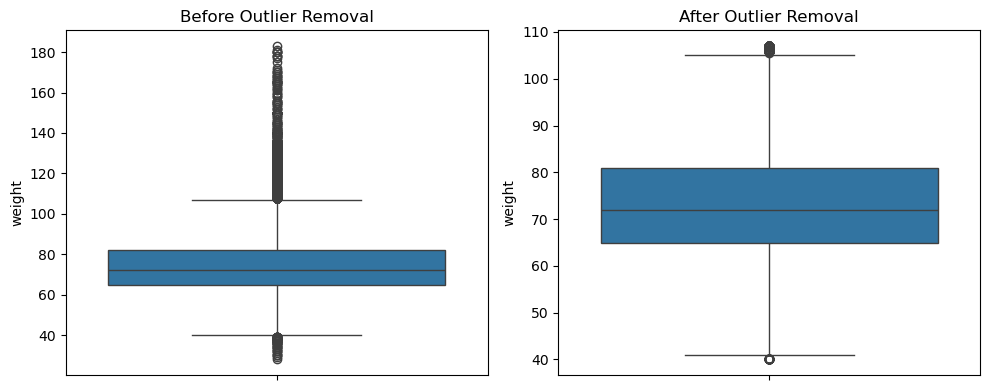

In [65]:
import seaborn as sns

plt.figure(figsize=(10, 4))


plt.subplot(1, 2, 1)
sns.boxplot(y=df['weight'])
plt.title('Before Outlier Removal')


plt.subplot(1, 2, 2)
sns.boxplot(y=df_filtered['weight'])
plt.title('After Outlier Removal')

plt.tight_layout()
plt.show()

In [66]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ageInYr,bmi
0,2,168,62.0,110,80,1,1,0,0,1,0,50.39,21.97
1,1,156,85.0,140,90,3,1,0,0,1,1,55.42,34.93
2,1,165,64.0,130,70,3,1,0,0,0,1,51.66,23.51
3,2,169,82.0,150,100,1,1,0,0,1,1,48.28,28.71
4,1,156,56.0,100,60,1,1,0,0,0,0,47.87,23.01


In [67]:
from sklearn.model_selection import train_test_split


x = df.drop(columns=['cardio'])
y = df.cardio


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [68]:
print(x_train)


       gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
54560       1     165    60.0    110     80            1     1      0     0   
49171       1     162    84.0    130    100            3     1      0     0   
64738       1     160    61.0    110     70            1     1      0     0   
9836        1     171    80.0    140     90            1     1      0     0   
15152       2     185    77.0    120     80            2     2      0     0   
...       ...     ...     ...    ...    ...          ...   ...    ...   ...   
37194       1     158   114.0    120     80            1     1      0     0   
6265        1     165    80.0    150    100            1     1      0     0   
54886       2     174    80.0    120     79            1     1      0     0   
860         1     167    70.0    120     80            1     1      0     0   
15795       1     166    66.0    120     80            1     1      0     0   

       active  ageInYr    bmi  
54560       1    46

In [69]:
print(y_train)

54560    1
49171    1
64738    1
9836     1
15152    0
        ..
37194    0
6265     1
54886    0
860      0
15795    0
Name: cardio, Length: 55964, dtype: int64


In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [71]:
x_train_scaled

array([[-0.72915407,  0.07669444, -0.98706326, ...,  0.49525462,
        -1.06109005, -1.0314761 ],
       [-0.72915407, -0.29912667,  0.68432608, ...,  0.49525462,
        -0.53532296,  0.85746029],
       [-0.72915407, -0.54967407, -0.91742204, ..., -2.01916338,
         0.45104571, -0.69233907],
       ...,
       [ 1.37145226,  1.20415776,  0.40576119, ...,  0.49525462,
        -0.20505237, -0.20163243],
       [-0.72915407,  0.32724184, -0.29065103, ..., -2.01916338,
        -0.50422125, -0.4517223 ],
       [-0.72915407,  0.20196814, -0.56921593, ...,  0.49525462,
         0.04820445, -0.66960363]])

In [72]:
x_test_scaled

array([[ 1.37145226,  1.07888405, -0.29065103, ...,  0.49525462,
        -1.49947612, -0.77570237],
       [-0.72915407, -1.55186369,  0.40576119, ..., -2.01916338,
        -1.1070021 ,  1.35385079],
       [ 1.37145226,  0.07669444,  0.26647875, ...,  0.49525462,
        -0.13544377,  0.22086788],
       ...,
       [ 1.37145226,  1.83052627,  0.40576119, ...,  0.49525462,
        -0.4760816 , -0.47635237],
       [-0.72915407,  0.57778925, -0.36029226, ...,  0.49525462,
         0.99310417, -0.62981661],
       [-0.72915407,  0.70306295,  1.52002075, ...,  0.49525462,
         1.58551779,  1.08670934]])

In [73]:
from sklearn.linear_model import LogisticRegression

# We use logistic regression because output is categorical and it gives me answer in 0 or 1

# Logical regression learn using gradient descent 
# Each iteration improves the weight and default is 100
# It tries up 1000 times to find the best weights

logisticRegression = LogisticRegression(max_iter=1000)
logisticRegression.fit(x_train_scaled , y_train)

LogisticRegression(max_iter=1000)

In [74]:
y_prediction = logisticRegression.predict(x_test_scaled)
y_prediction

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [75]:
from sklearn.metrics import confusion_matrix , classification_report

print(confusion_matrix(y_test , y_prediction))

[[5077 1871]
 [2352 4692]]


In [76]:
print(classification_report(y_test , y_prediction))

              precision    recall  f1-score   support

           0       0.68      0.73      0.71      6948
           1       0.71      0.67      0.69      7044

    accuracy                           0.70     13992
   macro avg       0.70      0.70      0.70     13992
weighted avg       0.70      0.70      0.70     13992



In [77]:
# Logistic Regression assumes a linear relationship between features and the log-odds of the outcome. 
# However, human health is rarely linear.

# Logistic Regression draws a straight line through the data. 
# If the "risk zone" is a complex shape (e.g., young smokers with high BP), 
# a straight line cannot capture it effectively without manual feature engineering.


# Tree-based models(Random Forest/Gradient Boosting) are naturally robust.If a patient has a BP of 180,a decision tree simply splits at "BP > 140"; 
# it doesn't matter if the value is 180 or 200,the split remains valid.

# We use RandomForestClassifier because it handles complex interactions (like Age + Smoking + High BP) better than simple linear models.

In [78]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators=100: Create 100 decision trees
# max_depth=10: Limit tree depth to prevent overfitting
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_model.fit(x_train_scaled, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [79]:
y_pred = rf_model.predict(x_test_scaled)
y_pred



array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [80]:
# 1. Scaling returns a numpy array (loses column names)
x_test_scaled_array = scaler.transform(x_test)

# 2. Convert it back to a DataFrame using the column names from X_train
x_test_scaled_df = pd.DataFrame(x_test_scaled_array, columns=x_train.columns)

# 3. Now Predict (Warning will disappear)
y_pred = rf_model.predict(x_test_scaled_df)


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [81]:
# K-fold - cross validation 

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

X = df.drop("cardio", axis=1)
y = df["cardio"]



rf = RandomForestClassifier(n_estimators=300, random_state=42)
scores = cross_val_score(rf, X, y, cv=skf, scoring='accuracy')
print("Average accuracy:", scores.mean())



Average accuracy: 0.7136199283791805


In [82]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [83]:


print("--- Performance ---")
print(f"Accuracy: {acc}")
print(f"Precision: {prec}")
print(f"Recall: {rec}")

--- Performance ---
Accuracy: 0.7324899942824471
Precision: 0.7602901750512537
Recall: 0.684412265758092


In [84]:
print(np.unique(y_train))

[0 1]


In [85]:
x_train

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,ageInYr,bmi
54560,1,165,60.0,110,80,1,1,0,0,1,46.18,22.04
49171,1,162,84.0,130,100,3,1,0,0,1,49.73,32.01
64738,1,160,61.0,110,70,1,1,0,0,0,56.39,23.83
9836,1,171,80.0,140,90,1,1,0,0,1,54.28,27.36
15152,2,185,77.0,120,80,2,2,0,0,1,53.85,22.50
...,...,...,...,...,...,...,...,...,...,...,...,...
37194,1,158,114.0,120,80,1,1,0,0,0,53.82,45.67
6265,1,165,80.0,150,100,1,1,0,0,0,58.11,29.38
54886,2,174,80.0,120,79,1,1,0,0,1,51.96,26.42
860,1,167,70.0,120,80,1,1,0,0,0,49.94,25.10


In [86]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[5428, 1520],
       [2223, 4821]], dtype=int64)

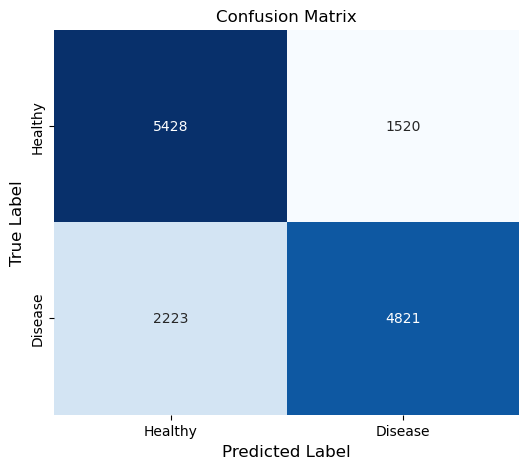

In [87]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Healthy', 'Disease'],
            yticklabels=['Healthy', 'Disease'])
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

In [88]:
# Gradient Boosting 

# Feature Engineering
df['hypertension'] = ((df['ap_hi'] >= 140) | (df['ap_lo'] >= 90)).astype(int)
df['obese'] = (df['bmi'] >= 30).astype(int)
df['age_group'] = pd.cut(df['ageInYr'], bins=[18,30,45,60,100], labels=False)

X = df.drop('cardio', axis=1)
y = df['cardio']


In [89]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [90]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=300,   
    learning_rate=0.05, 
    max_depth=3,        
    random_state=42
)


In [91]:
from xgboost import XGBClassifier

gb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    scale_pos_weight=1, # use for imbalanced dataset
    random_state=42
)


In [92]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gb, X, y, cv=skf, scoring='roc_auc')
print("Average ROC-AUC:", scores.mean())


Average ROC-AUC: 0.8030364803081026


In [93]:
from sklearn.model_selection import cross_validate

scoring = ['accuracy','precision','recall','f1','roc_auc']
results = cross_validate(gb, X, y, cv=skf, scoring=scoring)


In [94]:
gb.fit(X, y)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [95]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = gb.predict(X)
y_prob = gb.predict_proba(X)[:,1]

print(classification_report(y, y_pred))
print("ROC-AUC:", roc_auc_score(y, y_prob))


              precision    recall  f1-score   support

           0       0.72      0.78      0.75     35003
           1       0.76      0.70      0.73     34953

    accuracy                           0.74     69956
   macro avg       0.74      0.74      0.74     69956
weighted avg       0.74      0.74      0.74     69956

ROC-AUC: 0.8083339365202663


In [96]:
import pickle

with open('cardio_model.pkl', 'wb') as f:
    pickle.dump(gb, f)


In [ ]:
print(gb.get_booster().feature_names)


['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'ageInYr', 'bmi', 'hypertension', 'obese', 'age_group']
